(714, 901)


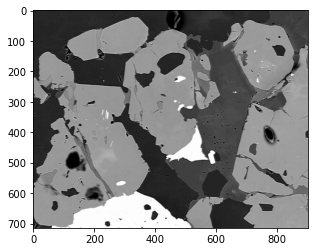

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu

# Read an image
img = io.imread("images/BSE_Google.jpg")
plt.imshow(img, cmap="gray")
print(img.shape)

In [9]:
thresholds = threshold_multiotsu(img, classes=5)

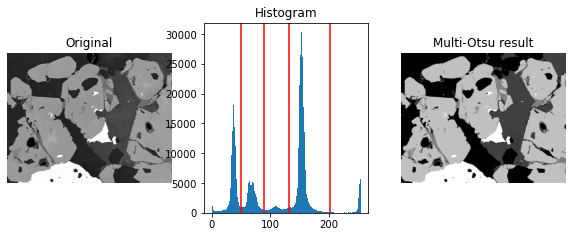

In [10]:

# Digitize (segment) original image into multiple classes.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(img, bins=thresholds)
output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8

plt.imsave("images/Otsu_Segmented.jpg", output)


#Let us look at the input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()